## Dean Sayre
## Lecture 10

## Homework: Solitons

Now we can study the soliton wave.  It is described by the Korteweg–de Vries equation

\begin{equation}
\frac{\partial U}{\partial t} + \epsilon U\frac{\partial U}{\partial x} + \mu \frac{\partial^3 U}{\partial x^3}= 0.
\end{equation}

The only thing new is that we need the difference form for the third derivative

\begin{equation}
\frac{\partial^3 f}{\partial x^3}=\frac{f_{i+2} - 2f_{i+1} + 2f_{i-1} - f_{i-2}}{2\Delta x^3}.
\end{equation}

Now, implement a code that solves the Korteweg–de Vries equation with an initial Gaussian profile as above.
Assume first that $\epsilon = 0.2$ and $\mu = 0.1$.

Can you use the same CFL condition as above?
Why or why not?
(Hint: What does the von Neumann stability analysis tell you?)

Once you are happy with your implementation, explore different values of $\epsilon$ and $\mu$.
What do they do?

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


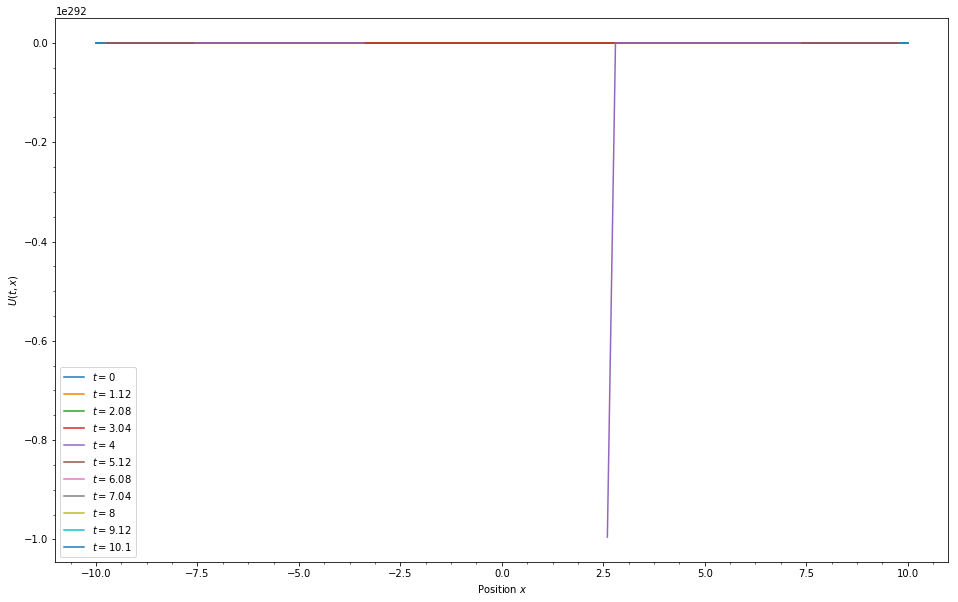

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx # notice the same initial value of dt!
U = np.zeros(Nx,)

t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

eps = 0.2
mu = 0.1
tout = t + dtout

while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # To find the next time step, a couple of things must change:
    # - Since the third order PDE requires us to step for and backwards by two time steps, the range at which we 
    #   begin our updates must change as well
    # - Compared to the previous example (Burger's Equation), we included another term (the third order derivative)
    #   by subtracting it off to solve for the current time step.
    for ix in range(2, Nx - 2):
        c1 = dt*eps*Uold[ix]/dx
        c2 = mu*dt/(2*dx**3)
        U[ix] = Uold[ix]-c1*(Uold[ix]-Uold[ix-1])-c2*(Uold[ix+2]-2*Uold[ix+1]+2*Uold[ix-1]-Uold[ix-2])
    t += dt

    # save data every second
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()
plt.show()

In [3]:
#Earlier we stated that the advection velocity = 1.

vel = 1.

# For the model above:

dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx


print(dt < dx/vel)

True


### As you can see, the CFL condition is applied, but we do not obtain a result that solves the Korteweg–de Vries equation with an initial Gaussian profile as above, so lets try different values.

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.001999999999891
t =  4.001999999999781
t =  5.001999999999671
t =  6.001999999999561
t =  7.001999999999451
t =  8.001999999999342
t =  9.001999999999676
t =  10.000000000000009


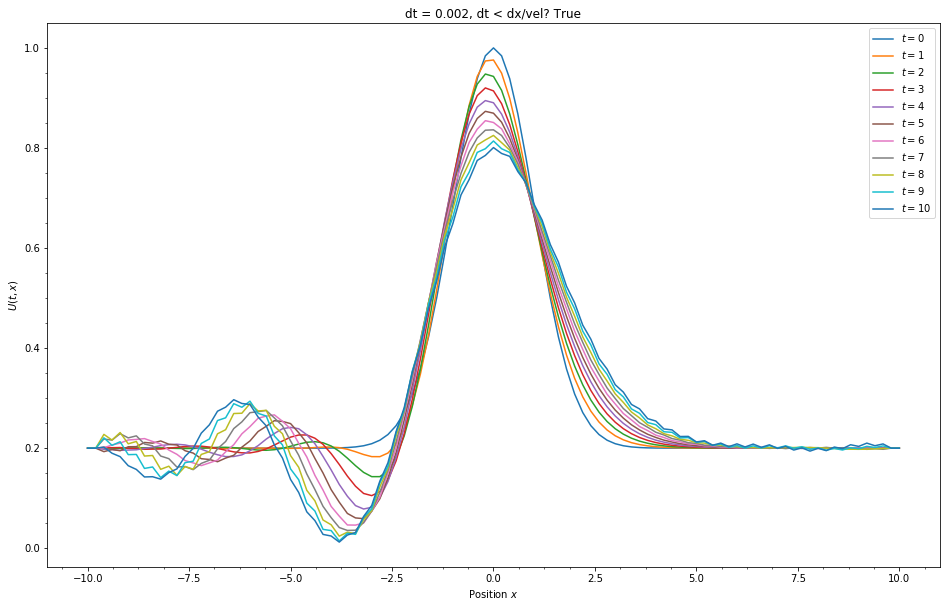

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.003999999999892
t =  6.003999999999782
t =  7.003999999999672
t =  8.003999999999563
t =  9.003999999999452
t =  10.003999999999342


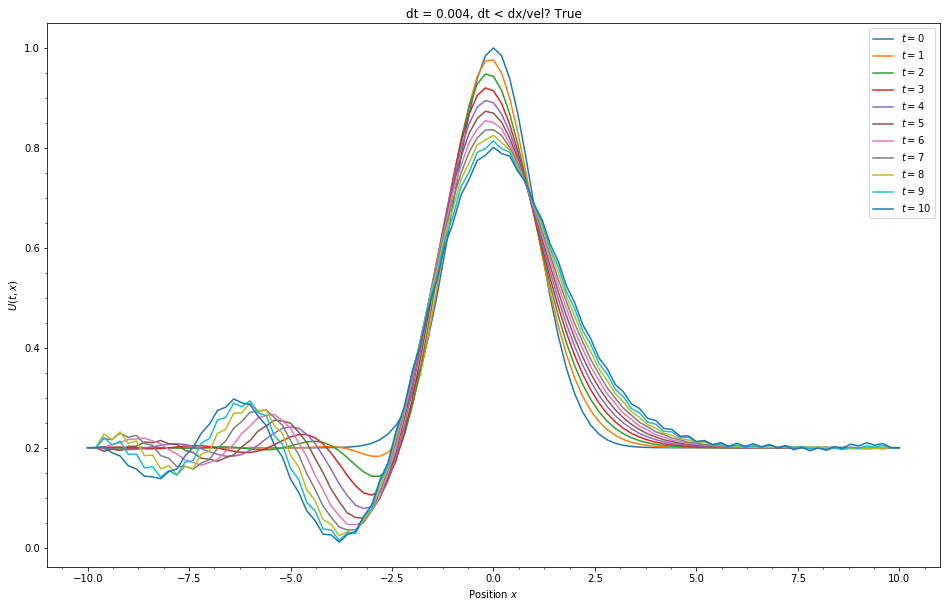

t =  1.0020000000000007
t =  2.0040000000000013
t =  3.005999999999965
t =  4.00199999999993
t =  5.003999999999968
t =  6.000000000000005
t =  7.002000000000043
t =  8.004000000000081
t =  9.000000000000119
t =  10.002000000000157


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


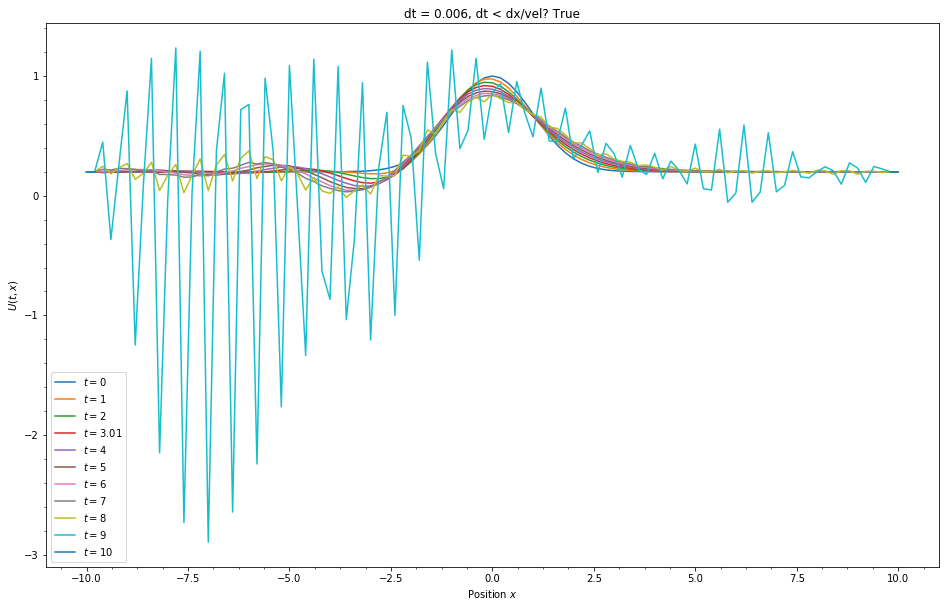

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.0000000000000036
t =  6.000000000000004
t =  7.000000000000005
t =  8.000000000000005
t =  9.007999999999894
t =  10.007999999999784


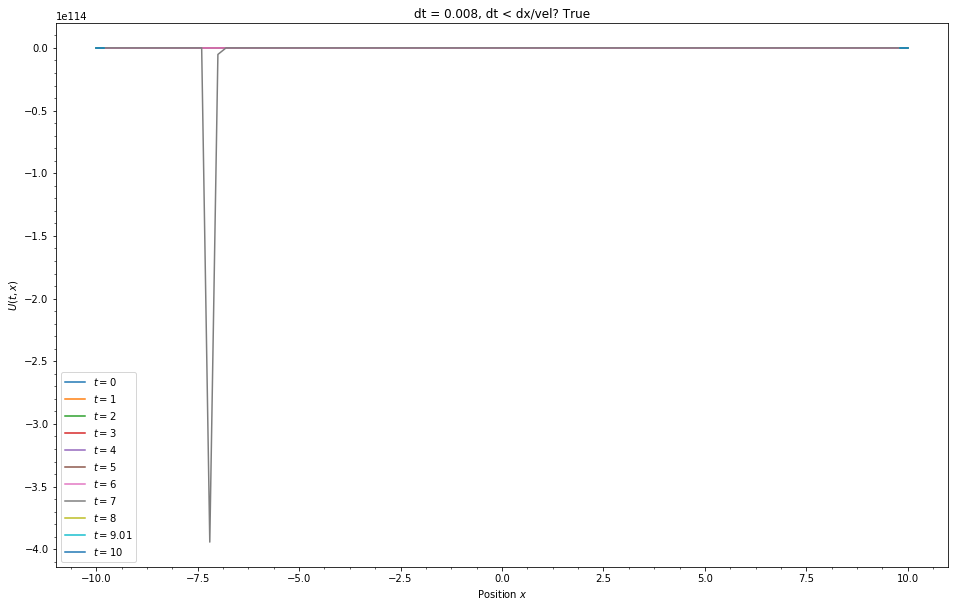

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.00999999999998
t =  4.009999999999959
t =  5.009999999999938
t =  6.009999999999916
t =  7.009999999999895
t =  8.009999999999874
t =  9.009999999999852
t =  10.009999999999831


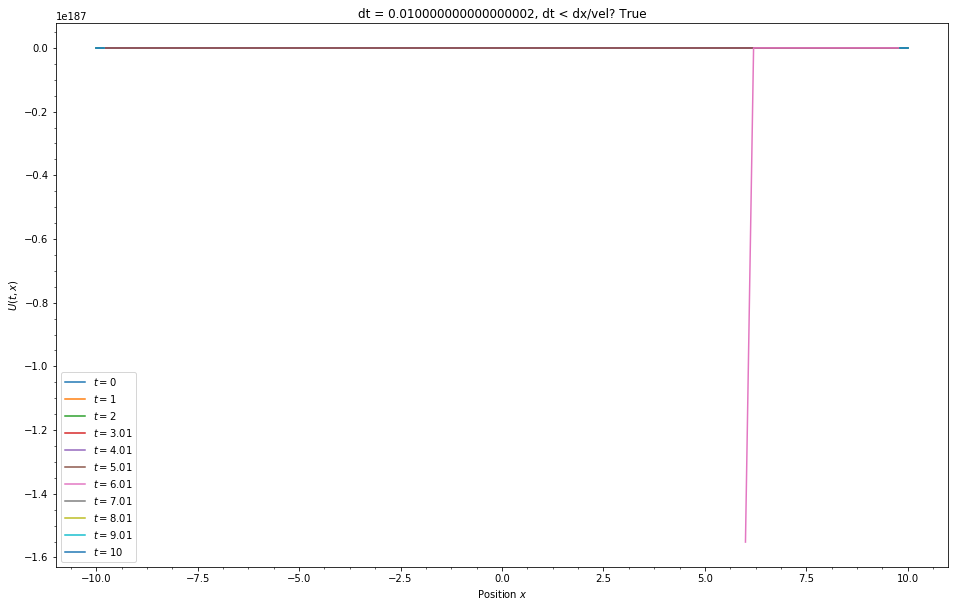

t =  1.0080000000000007
t =  2.0040000000000013
t =  3.000000000000002
t =  4.008000000000003
t =  5.003999999999967
t =  6.01199999999993
t =  7.007999999999894
t =  8.00399999999986
t =  9.011999999999897
t =  10.007999999999935


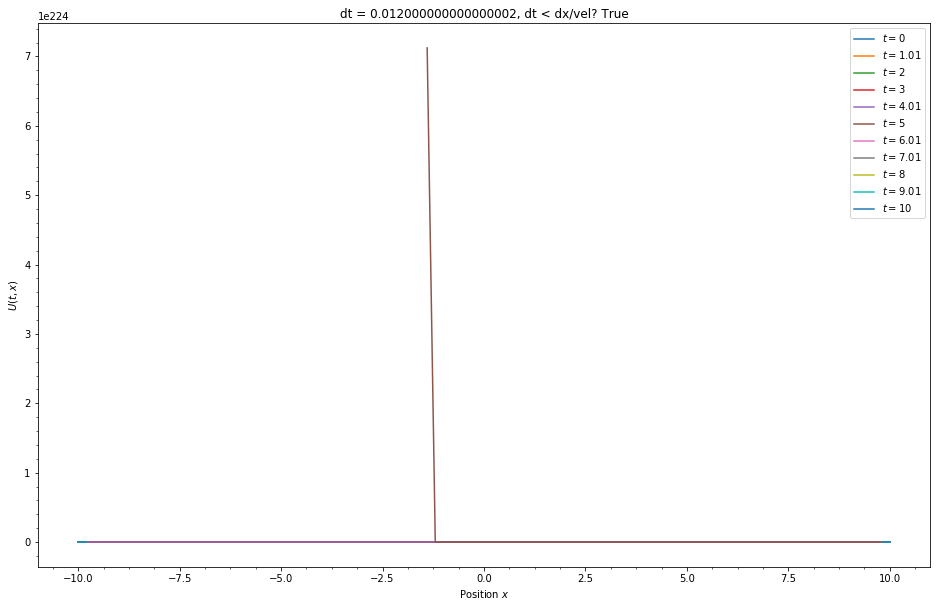

t =  1.0080000000000007
t =  2.0020000000000016
t =  3.0099999999999865
t =  4.003999999999972
t =  5.011999999999989
t =  6.006000000000006
t =  7.000000000000022
t =  8.008000000000038
t =  9.001999999999992
t =  10.009999999999945


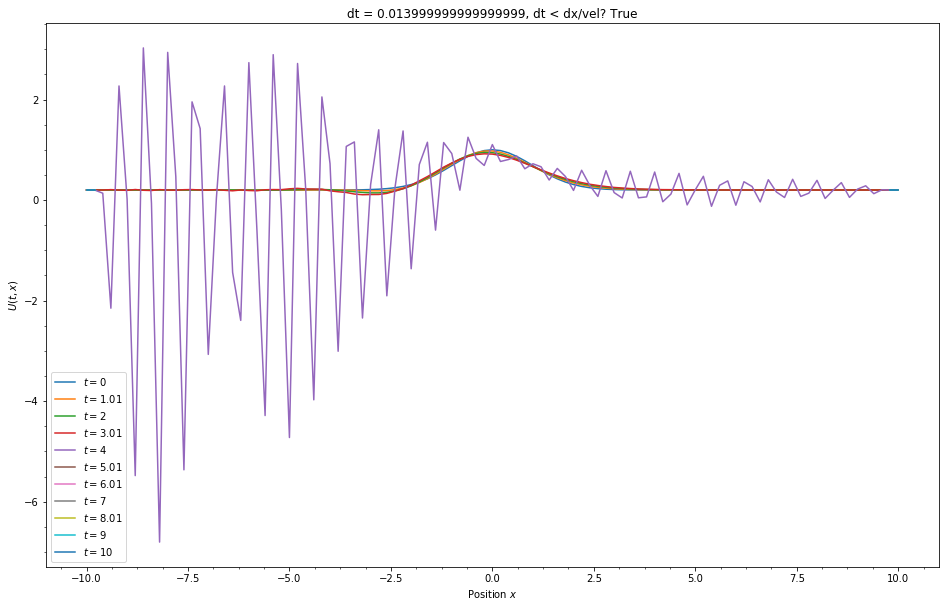

t =  1.0080000000000007
t =  2.0000000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.008000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.000000000000005
t =  9.008000000000006
t =  10.000000000000007


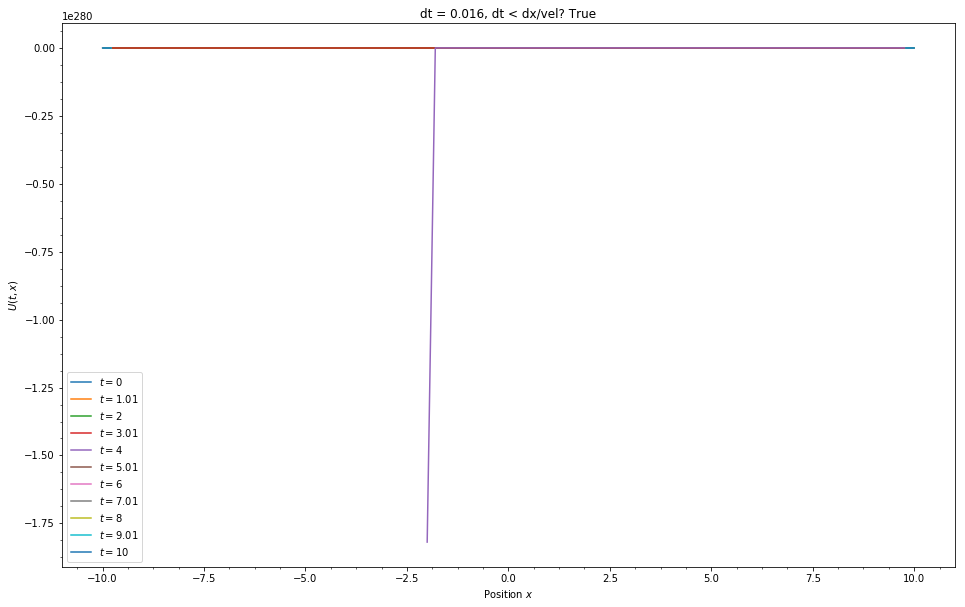

t =  1.0080000000000005
t =  2.0160000000000013
t =  3.00599999999999
t =  4.013999999999979
t =  5.003999999999968
t =  6.011999999999956
t =  7.001999999999945
t =  8.009999999999934
t =  9.017999999999972
t =  10.00800000000001


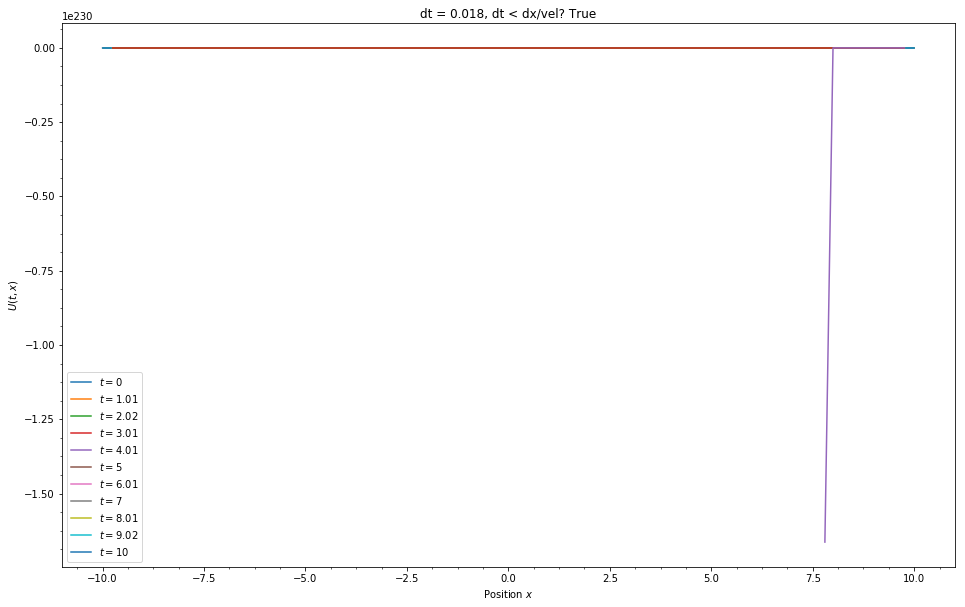

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

    # Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs
eps = 0.2
mu = 0.1
vel = 1
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)

# here i initialize and array with different values of dt varying from 0.002 - 0.018
arr = np.arange(0.01,0.1,0.01) 
dt = arr * dx 

# loop over the values and plot.
for i in dt:

    # Set up the grid.
    U = np.zeros(Nx,)

    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()
    
    tout = t + dtout
    while t < tend:
        # Backup the previous time step.
        Uold = np.copy(U)

        # To find the next time step, a couple of things must change:
        # - Since the third order PDE requires us to step for and backwards by two time steps, the range at which we 
        #   begin our updates must change as well
        # - Compared to the previous example (Burger's Equation), we included another term (the third order derivative)
        #   by subtracting it off to solve for the current time step.
        for ix in range(2, Nx - 2):
            c1 = i*eps*Uold[ix]/dx
            c2 = mu*i/(2*dx**3)
            U[ix] = Uold[ix]-c1*(Uold[ix]-Uold[ix-1])-c2*(Uold[ix+2]-2*Uold[ix+1]+2*Uold[ix-1]-Uold[ix-2])
        t += i
        # Save the data after every dtout.
        if t >= tout:
            #prints the value of dt and whether or not previous CFL is satisfied
            plt.title('dt = '+str(i)+', dt < dx/vel? '+str(i<dx/vel))
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout

    ax.legend()
    plt.show()

### From the above plot, it is obvious that the previous CFL is satisfied, but the stability is not always available. In dt = 0.002 and 0.004, we get the gaussian shape we are looking for. As dt increases from here, that goal falls off.

### Next we study the influence of changing mu and epsilon, I make the method into a function.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def change_par(_eps,_mu):
    # Model Parameters
    xmin = -10.0   # left boundary
    xmax = +10.0   # right boundary
    Nx = 101      # number of grid points (including boundary)
    tend = 10.0    # end time
    dtout = 1.0   # time interval for outputs

    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = 0.004 * dx
    U = np.zeros(Nx,)

    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()

    eps = _eps
    mu = _mu
    tout = t + dtout

    while t < tend:
        # Backup the previous time step.
        Uold = np.copy(U)

        # To find the next time step, a couple of things must change:
        # - Since the third order PDE requires us to step for and backwards by two time steps, the range at which we 
        #   begin our updates must change as well
        # - Compared to the previous example (Burger's Equation), we included another term (the third order derivative)
        #   by subtracting it off to solve for the current time step.
        for ix in range(2, Nx - 2):
            c1 = dt*eps*Uold[ix]/dx
            c2 = mu*dt/(2*dx**3)
            U[ix] = Uold[ix]-c1*(Uold[ix]-Uold[ix-1])-c2*(Uold[ix+2]-2*Uold[ix+1]+2*Uold[ix-1]-Uold[ix-2])
            #print(dx/U[ix])
        t += dt

        # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout

    ax.legend()
    plt.show()

t =  1.0000000000000204
t =  2.00079999999991
t =  3.0007999999998
t =  4.00079999999969
t =  5.00079999999958
t =  6.00079999999947
t =  7.0007999999993595
t =  8.00079999999925
t =  9.00079999999914
t =  10.00079999999903


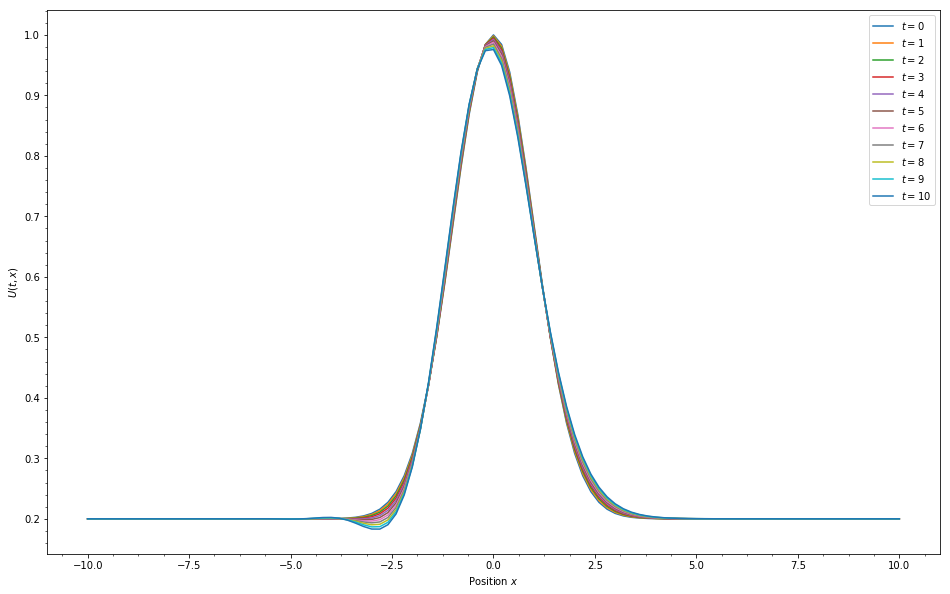

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


t =  1.0000000000000204
t =  2.00079999999991
t =  3.0007999999998
t =  4.00079999999969
t =  5.00079999999958
t =  6.00079999999947
t =  7.0007999999993595
t =  8.00079999999925
t =  9.00079999999914
t =  10.00079999999903


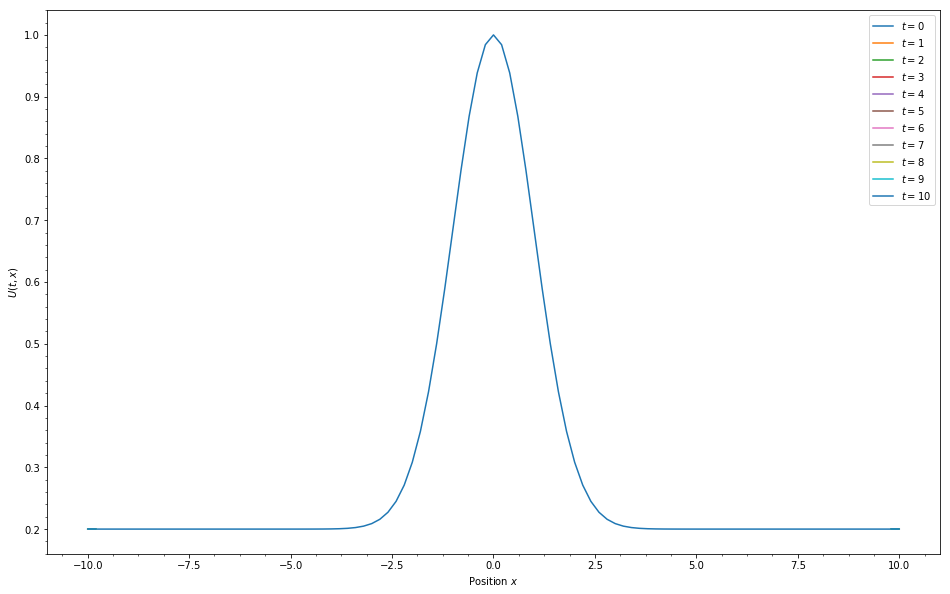

t =  1.0000000000000204
t =  2.00079999999991
t =  3.0007999999998
t =  4.00079999999969
t =  5.00079999999958
t =  6.00079999999947
t =  7.0007999999993595
t =  8.00079999999925
t =  9.00079999999914
t =  10.00079999999903


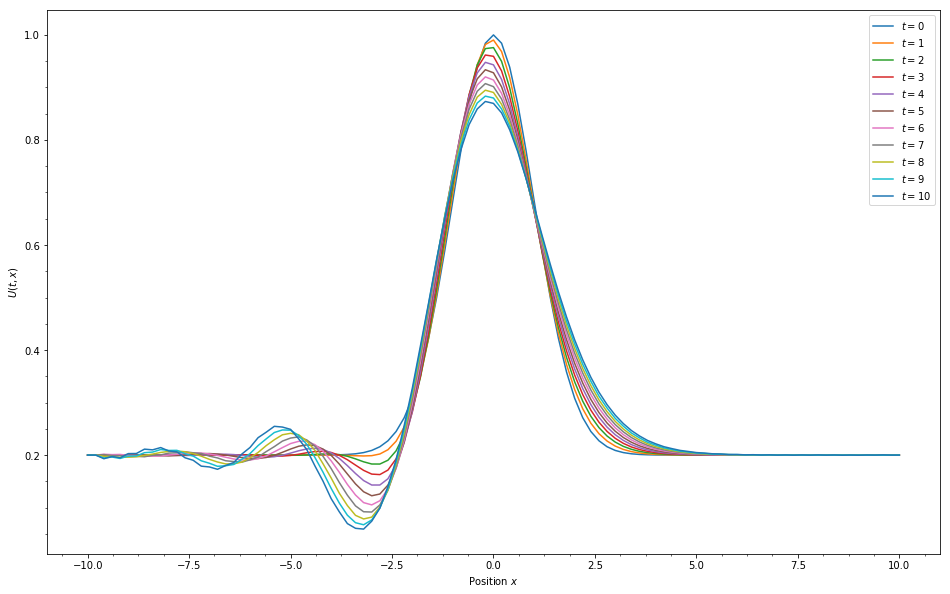

t =  1.0000000000000204
t =  2.00079999999991
t =  3.0007999999998
t =  4.00079999999969
t =  5.00079999999958
t =  6.00079999999947
t =  7.0007999999993595
t =  8.00079999999925
t =  9.00079999999914
t =  10.00079999999903


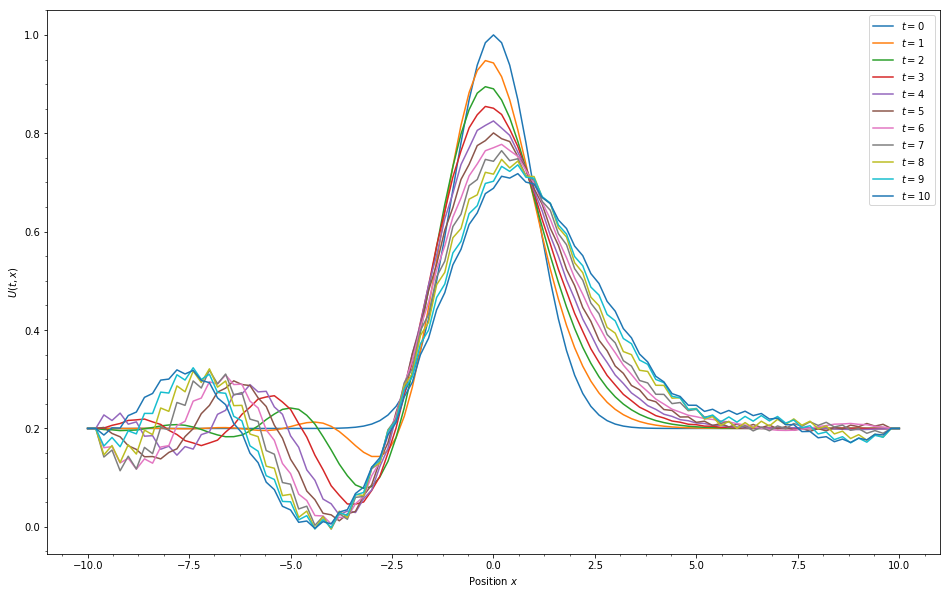

In [6]:
# Initial values: 
eps = 0.2
mu = 0.1

change_par(eps/10,mu/10) # factor of 10 dec.
change_par(eps*10,mu*10) # factor of 10 inc.
change_par(eps/2,mu/2) # small dec.
change_par(eps*2,mu*2) # small inc.



### the below plots show that a greater decrease in both parameters lead to a better evaluation of the soliton wave general solution at each time step.